# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
df_obesity = pd.read_excel("obesity_cleaned.xlsx", index_col=0)

In [3]:
df_obesity.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [4]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].str.split(' ').str[0]

In [5]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity["Obesity"] = df_obesity["Obesity"].dropna()

In [6]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))

In [7]:
df_obesity.set_index("Year", inplace=True)

In [8]:
df_obesity.dtypes

Country         object
Obesity (%)     object
Sex             object
Obesity        float64
dtype: object

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [9]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean("Obesity")

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [10]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

In [11]:
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [12]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [13]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [14]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [15]:
df_2015 = df_obesity[df_obesity.index == 2015]

In [16]:
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [17]:
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [18]:
df_brazil = df_obesity[df_obesity["Country"] == "Brazil"]

<Axes: xlabel='Year'>

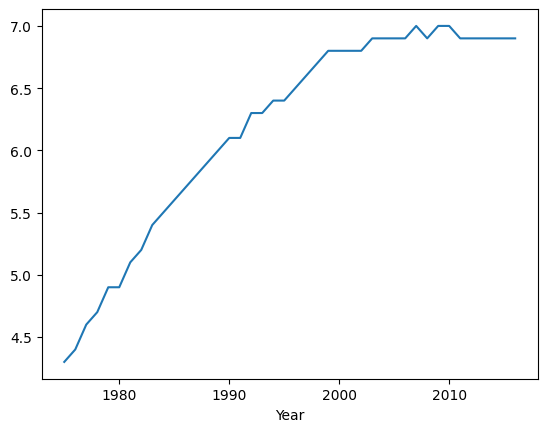

In [19]:
(df_brazil[df_brazil["Sex"] == "Female"]["Obesity"] - df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [20]:
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]

<Axes: xlabel='Year'>

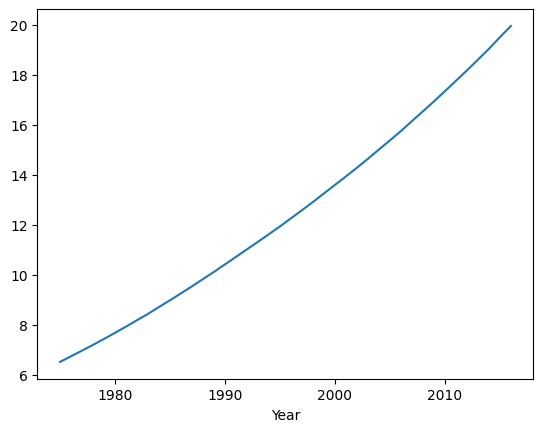

In [21]:
df_both.groupby("Year")["Obesity"].mean().plot()

- Extra: Gráfico comparativo entre as evoluções por sexo no mundo

In [22]:
df_sexes = df_obesity[df_obesity["Sex"] == "Female"].copy()
df_sexes.rename(columns={"Obesity": "Obesity_F"}, inplace=True)
df_sexes["Obesity_M"] = df_obesity[df_obesity["Sex"] == "Male"]["Obesity"]
df_sexes.drop(columns=["Obesity (%)", "Sex"], inplace=True)

<Axes: xlabel='Year'>

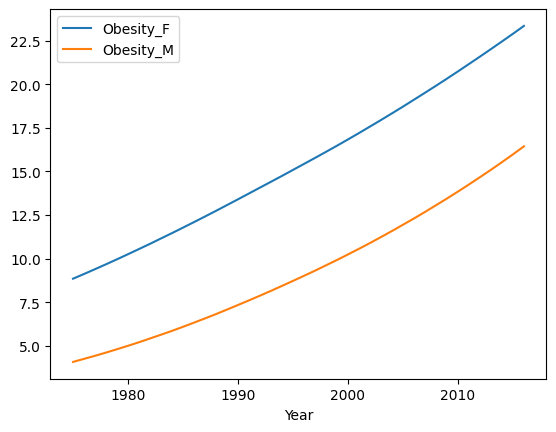

In [23]:
df_sexes.groupby("Year")[["Obesity_F", "Obesity_M"]].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [24]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")

In [25]:
df_gdp.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [26]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [27]:
df_gdp[" GDP_pp "].replace(r",", "", regex=True, inplace=True)
df_gdp[" GDP_pp "] = df_gdp[" GDP_pp "].apply(lambda x: float(x))

C:\Users\leona\AppData\Local\Temp\ipykernel_22356\3543060841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gdp[" GDP_pp "].replace(r",", "", regex=True, inplace=True)


In [28]:
df_gdp["Year"] = pd.to_datetime(df_gdp["Year"])

In [29]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Country   4419 non-null   object        
 1   Region    4419 non-null   object        
 2   Year      4419 non-null   datetime64[ns]
 3    GDP_pp   4419 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 138.2+ KB


- Você conseguiria informar o primeiro valor registrado de cada país?

In [30]:
df_gdp.groupby("Country")[["Year", " GDP_pp "]].first()

,Year,GDP_pp
Country,,
Afghanistan,1901-01-01,613.99
Albania,1901-01-01,1062.01
Algeria,1901-01-01,1807.76
Andorra,1901-01-01,3352.50
Angola,1901-01-01,525.76
...,...,...
Venezuela,1901-01-01,766.21
Vietnam,1901-01-01,572.96
"Yemen, Rep.",1901-01-01,729.39


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [31]:
df_1901 = df_gdp[df_gdp["Year"].apply(lambda x: x.year == 1901)].groupby("Region")[" GDP_pp "].mean()
df_1996 = df_gdp[df_gdp["Year"].apply(lambda x: x.year == 1996)].groupby("Region")[" GDP_pp "].mean()

In [32]:
((df_1996 / df_1901 - 1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name:  GDP_pp , dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [33]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: x.year)

In [34]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
df_all_years.index = df_all_years["Year"]

# ~ faz com que os valores que seriam retornados com True sejam retornados como False e vice-versa
df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off = df_all_years.loc[df_years_off].index

In [35]:
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [36]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

df_gdp["delta_gdp"] = df_gdp[" GDP_pp "] - df_gdp[" GDP_pp "].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [37]:
df_gdp

,Country,Region,Year,GDP_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [38]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [39]:
df_gdp.head()

,Country,Region,Year,GDP_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [40]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]

    for new_year in years_to_add:
        add_row = row.copy()
        add_row[" GDP_pp "] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row[" GDP_pp "]
        add_row["Year"] = new_year
        add_row["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [41]:
df_new_data

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [42]:
df_gdp = pd.concat([df_gdp, df_new_data])
df_gdp.sort_values(["Country", "Year"], inplace=True)
df_gdp.index = df_gdp["Year"]

In [43]:
df_gdp["kind"].fillna("real", inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_22356\3479489754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gdp["kind"].fillna("real", inplace=True)


In [44]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel=' GDP_pp '>

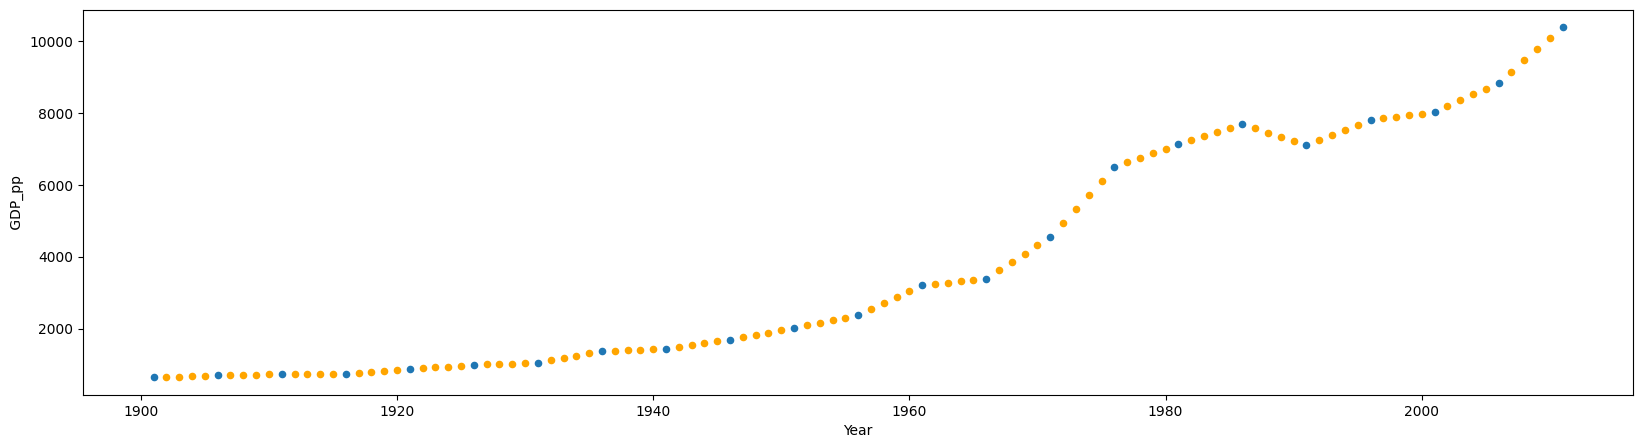

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))

country = "Brazil"
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == country)].plot(kind="scatter", y=" GDP_pp ", x="Year", ax=ax)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == country)].plot(kind="scatter", y=" GDP_pp ", x="Year", ax=ax, color="orange")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [53]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp[" GDP_pp "] = df_gdp[" GDP_pp "].astype(float)
df_gdp.rename(columns={" GDP_pp ": "gdp_pp"}, inplace=True)

In [57]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}

df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha)
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [60]:
df_obesity["Country-Year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("Country-Year").to_dict()["Obesity"]

In [61]:
df_gdp["Country-Year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(int(x))).values
df_gdp["Obesity"] = df_gdp["Country-Year"].map(dict_obesity_year)

In [63]:
df_gdp_clean = df_gdp.dropna()

In [69]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp_pp"]].mean().corr()

,Obesity,gdp_pp
Obesity,1.000000,0.969378
gdp_pp,0.969378,1.000000
